# Machine Learning Model Development

## Conclusion

After hyperparameter tuning we observed the performance of the three models to decide which gives the best outcome and be deployed to use for our original task. The performance metrics from the three models are stored in the form of a dataframe and are ploted to visualize the performances.

In [83]:
Perf={
    'Model'               : ['LR','SVM','KNN'],
    'Average_Precision'   : [Precision_LR,Precision_SVM,Precision_KNN],
    'Average_Recall'      : [Recall_LR,Recall_SVM,Recall_KNN],
    'Accuracy'            : [Accuracy_LR,Accuracy_SVM,Accuracy_KNN],
    'Loss'                : [Loss_LR,Loss_SVM,Loss_KNN],
    'Average_Specificity' : [Specificity_LR,Specificity_SVM,Specificity_KNN]
}
performance = pd.DataFrame(Perf)
performance

,Model,Average_Precision,Average_Recall,Accuracy,Loss,Average_Specificity
0,LR,70,74,79,8.143879,95
1,SVM,77,80,82,6.543166,96
2,KNN,78,80,81,7.040806,96


It is obvious from the dataframe above that KNN gives the best performance and LR the least. The same thing is observed in the plots below:

Text(0.5, 0, 'Model')

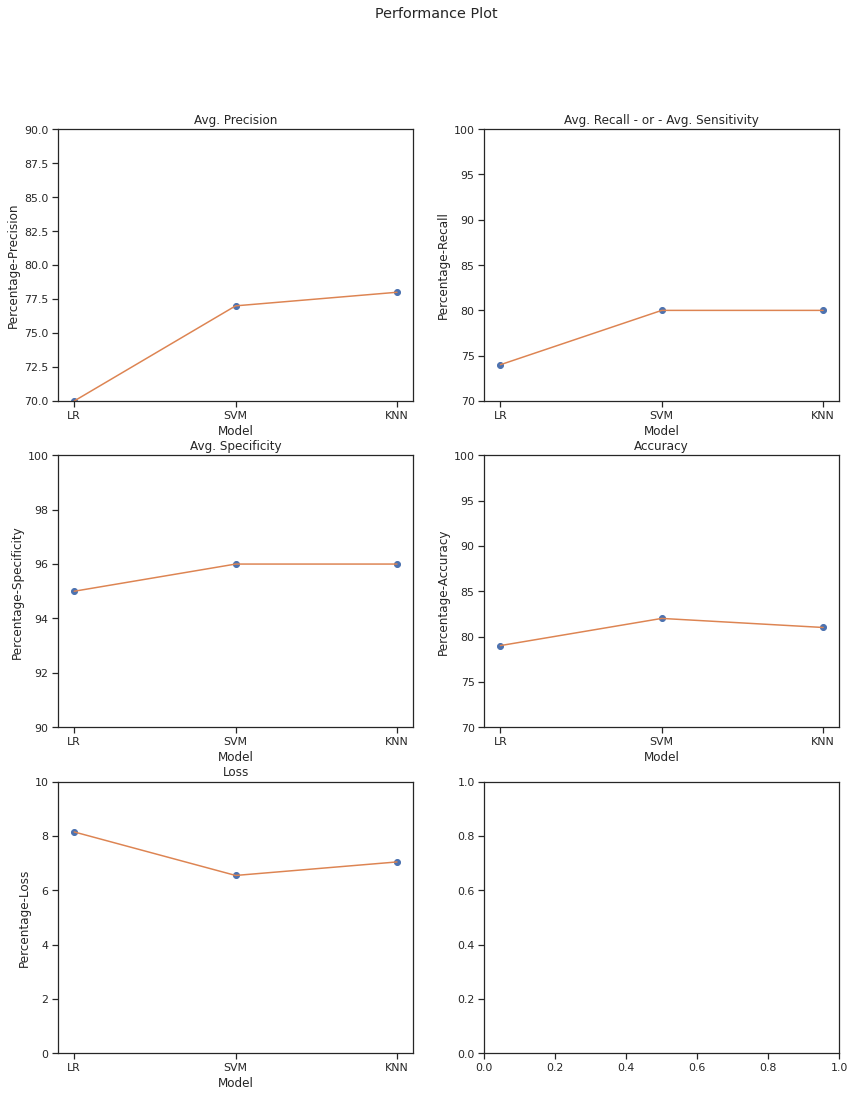

In [84]:
fig, ((axs1,axs2),(axs3,axs4),(axs5,axs6)) = plt.subplots(3,2, figsize=(14, 17))
fig.suptitle('Performance Plot')

axs1.plot(performance.Model,performance.Average_Precision,'o')
axs1.plot(performance.Model,performance.Average_Precision)
axs1.set_title('Avg. Precision')
axs1.set_ylim((70,90))
axs1.set_ylabel('Percentage-Precision')
axs1.set_xlabel('Model')

axs2.plot(performance.Model,performance.Average_Recall,'o')
axs2.plot(performance.Model,performance.Average_Recall)
axs2.set_title('Avg. Recall - or - Avg. Sensitivity')
axs2.set_ylim((70,100))
axs2.set_ylabel('Percentage-Recall')
axs2.set_xlabel('Model')

axs3.plot(performance.Model,performance.Average_Specificity,'o')
axs3.plot(performance.Model,performance.Average_Specificity)
axs3.set_title('Avg. Specificity')
axs3.set_ylim((90,100))
axs3.set_ylabel('Percentage-Specificity')
axs3.set_xlabel('Model')

axs4.plot(performance.Model,performance.Accuracy,'o')
axs4.plot(performance.Model,performance.Accuracy)
axs4.set_title('Accuracy')
axs4.set_ylim((70,100))
axs4.set_ylabel('Percentage-Accuracy')
axs4.set_xlabel('Model')

axs5.plot(performance.Model,performance.Loss,'o')
axs5.plot(performance.Model,performance.Loss)
axs5.set_title('Loss')
axs5.set_ylim((0,10))
axs5.set_ylabel('Percentage-Loss')
axs5.set_xlabel('Model')

This makes KNN the model of choice and this was also the expected outcome.

In [85]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve,auc

In [86]:
KNN=OneVsRestClassifier(knn)
KNN.fit(X_train,y_train)
y_pred_KNN =KNN.predict(X_test)
pred_prob_KNN = KNN.predict_proba(X_test)



LR=OneVsRestClassifier(model_logistic)
LR.fit(X_train,y_train)
y_pred_LR =LR.predict(X_test)
pred_prob_LR = LR.predict_proba(X_test)



SVM=OneVsRestClassifier(model_svm)
SVM.fit(X_train,y_train)
y_pred_SVM =SVM.predict(X_test)
pred_prob_SVM = SVM.predict_proba(X_test)

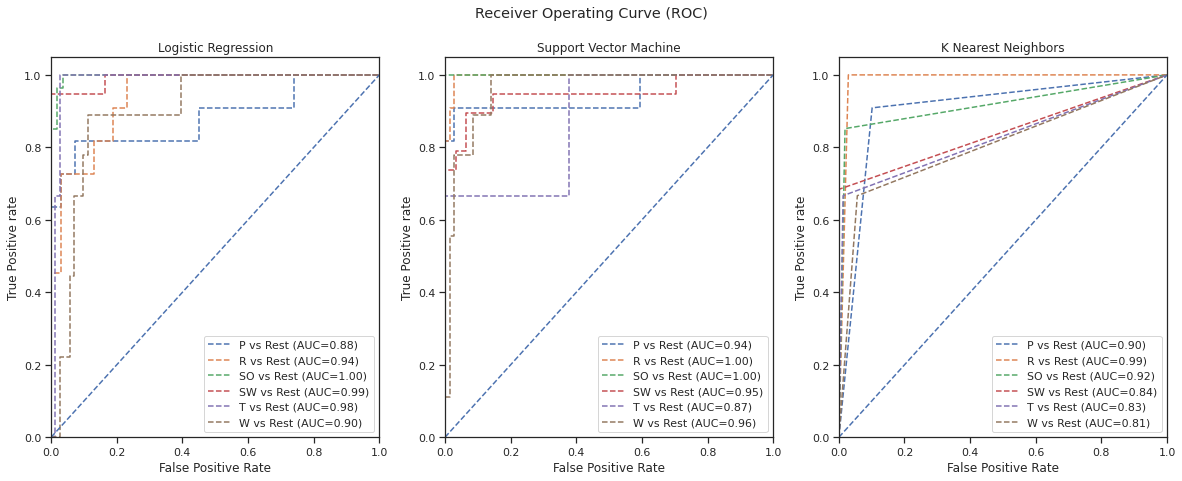

In [87]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# Figure Setting for Subplots

fig, (axs1,axs2,axs3) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Receiver Operating Curve (ROC)')

# roc curves for Logistic Regression
fpr_LR = {}
tpr_LR = {}
thresh_LR ={}
roc_auc_LR = dict()
# roc curves for Support Vector Machine
fpr_SVM = {}
tpr_SVM = {}
thresh_SVM ={}
roc_auc_SVM = dict()
# roc curves for K Nearest Neighbors
fpr_KNN = {}
tpr_KNN = {}
thresh_KNN ={}
roc_auc_KNN = dict()

n_class = label.classes_.shape[0]


for i in range(n_class):    
    fpr_LR[i], tpr_LR[i], thresh_LR[i] = roc_curve(y_test_binarized[:,i], pred_prob_LR[:,i])
    roc_auc_LR[i] = auc(fpr_LR[i], tpr_LR[i])# creating roc curve for LR
    
    fpr_SVM[i], tpr_SVM[i], thresh_SVM[i] = roc_curve(y_test_binarized[:,i], pred_prob_SVM[:,i])
    roc_auc_SVM[i] = auc(fpr_SVM[i], tpr_SVM[i])# creating roc curve for SVM
    
    fpr_KNN[i], tpr_KNN[i], thresh_KNN[i] = roc_curve(y_test_binarized[:,i], pred_prob_KNN[:,i])
    roc_auc_KNN[i] = auc(fpr_KNN[i], tpr_KNN[i])# creating roc curve for KNN
    
    
    # plotting  

    axs1.plot(fpr_LR[i], tpr_LR[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(label.classes_[i],roc_auc_LR[i]))
    
    axs2.plot(fpr_SVM[i], tpr_SVM[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(label.classes_[i],roc_auc_SVM[i]))

    axs3.plot(fpr_KNN[i], tpr_KNN[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(label.classes_[i],roc_auc_KNN[i]))

#Setting axis for the plots

axs1.plot([0,1],[0,1],'b--')
axs1.set_xlim([0,1])
axs1.set_ylim([0,1.05])
axs1.set_title('Logistic Regression')
axs1.set_xlabel('False Positive Rate')
axs1.set_ylabel('True Positive rate')
axs1.legend(loc='lower right')
    
axs2.plot([0,1],[0,1],'b--')
axs2.set_xlim([0,1])
axs2.set_ylim([0,1.05])
axs2.set_title('Support Vector Machine')
axs2.set_xlabel('False Positive Rate')
axs2.set_ylabel('True Positive rate')
axs2.legend(loc='lower right')

axs3.plot([0,1],[0,1],'b--')
axs3.set_xlim([0,1])
axs3.set_ylim([0,1.05])
axs3.set_title('K Nearest Neighbors')
axs3.set_xlabel('False Positive Rate')
axs3.set_ylabel('True Positive rate')
axs3.legend(loc='lower right')

The AUC is used to determine which model gives better result at what value of threshold. The greater the area under the curve, the better the model is. But this kind of analysis is more useful in case of binary classification. In our case, we have 6 classes for each model. What we can do is to create an ROC curve for each class, whith respect to all the reamaining classes (One vs Rest), and then find the ares under all these curves respectively, which is what we have done in the above image. If the detection of a certain class of bird is more important than others, we can compare that class for each model and see which model gives a better result for that class depending on the AUC value. Also for an over-all observation, we can say that the model that has higher number of AUC with greater/reasonable values performs better than the other two. Forexample, If we wanted to have better observations for just the Swimming Birds, the values of AUC are 0.89, 0.99, and 0.98 for KNN, LR, and SVM respectively. This suggests that LR gives the best results in this case. But if we observe carefully, all  have an average AUC value more than 90%. As for our model we need more number of ture possitives as compared to false negatives, we would consider choosing a model that has a point as close as possible to the uper left corner of the plot which in this case is KNN.